In [10]:
def plot_Complete_carepath_clustered (myouputpath, mlflow, mlflowname):
    import my_custom_func_TS_Clust_1 as Mcftsc
    import Sql_Alchemy_Classes as AlSQL
    import matplotlib.pyplot as plt

    Requete="""SELECT Table_Acte.[NIP]  
                ,Table_Cluster.Cl_P as Clust  
                ,Table_Cluster.X_abscisse   
                ,Table_Acte.[J_Parcours_V1]  
                ,Table_Acte.[J_Parcours_V3]   
                ,Table_Acte.[Service] 
                ,Table_Acte.[Activite]   
                ,Table_Acte.[Phase]   
                ,Table_Acte.[Dimension]   
                ,Table_Acte.[Type_seq]  
                
                FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
                , [ICO_Activite].[dbo].[Mlflow_Exp_NIP_Cl_P1_CPP] as Table_Cluster
                WHERE Table_Cluster.NIP = Table_Acte.NIP
                ORDER BY Clust asc ,Table_Acte.[J_Parcours_V1] desc, Table_Acte.[NIP]
    """

    df_Actes_graph=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')
    Mcftsc.plot_carepath(df_Actes_graph,None,None,None)

    plt.savefig(myouputpath + mlflowname + '.png')
    mlflow.log_artifact(myouputpath + mlflowname + '.png', 'Plots')

    return

In [13]:
def plot_Complete_carepath_clustered_clustX (myouputpath, mlflow, mlflowname,clustnb):
    import my_custom_func_TS_Clust_1 as Mcftsc
    import Sql_Alchemy_Classes as AlSQL
    import matplotlib.pyplot as plt

    Requete="""SELECT Table_Acte.[NIP]  
                ,Table_Cluster.Cl_P as Clust  
                ,Table_Cluster.X_abscisse   
                ,Table_Acte.[J_Parcours_V1]  
                ,Table_Acte.[J_Parcours_V3]   
                ,Table_Acte.[Service] 
                ,Table_Acte.[Activite]   
                ,Table_Acte.[Phase]   
                ,Table_Acte.[Dimension]   
                ,Table_Acte.[Type_seq]  
                
                FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
                , [ICO_Activite].[dbo].[Mlflow_Exp_NIP_Cl_P1_CPP] as Table_Cluster
                WHERE Table_Cluster.NIP = Table_Acte.NIP and Table_Cluster.Cl_P=""" + str(clustnb) +"""
                ORDER BY Clust asc ,Table_Acte.[J_Parcours_V1] desc, Table_Acte.[NIP]
    """

    df_Actes_graph=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')
    Mcftsc.plot_carepath(df_Actes_graph,None,None,None)

    plt.savefig(myouputpath + mlflowname + '.png')
    mlflow.log_artifact(myouputpath + mlflowname + '.png', 'Plots')

    return

In [20]:
def plot_Complete_carepath_clustered_filtered_clustX (myouputpath, mlflow, mlflowname,clustnb):
    import my_custom_func_TS_Clust_1 as Mcftsc
    import Sql_Alchemy_Classes as AlSQL
    import matplotlib.pyplot as plt

    Requete="""SELECT Table_Acte.[NIP]  
            ,Table_Cluster.Cl_P as Clust  
            ,Table_Cluster.X_abscisse   
            ,Table_Acte.[J_Parcours_V1]  
            ,Table_Acte.[J_Parcours_V3]   
            ,Table_Acte.[Service] 
            ,Table_Acte.[Activite]   
            ,Table_Acte.[Phase]   
            ,Table_Acte.[Dimension]   
            ,Table_Acte.[Type_seq]  
            
            FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
            , [ICO_Activite].[dbo].[Mlflow_Exp_NIP_Cl_P1_CPP] as Table_Cluster
            
            WHERE Table_Cluster.NIP = Table_Acte.NIP

            ORDER BY Clust asc ,Table_Acte.[J_Parcours_V1] desc, Table_Acte.[NIP]"""

    df_Actes_graph=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')
    Mcftsc.plot_carepath(df_Actes_graph,None,None,None)

    Mcfcp.Prepare_Save_Plot_one_clust(df_Actes_graph,df_Parcours_clust,CPP_Param['primary_clust_name'], CPP_Param['CPP_order'],myouputpath,nameToBeSaved,Requete,Filter_df_col,Filter_df_value,mlflow, nameToBeSaved)
    
    #plt.savefig(myouputpath + mlflowname + '.png')
    #mlflow.log_artifact(myouputpath + mlflowname + '.png', 'Plots')

    return

2024-01-13 12:17:08,120 INFO sqlalchemy.engine.Engine SELECT Table_Acte.[NIP]  
            ,Table_Cluster.Cl_P as Clust  
            ,Table_Cluster.X_abscisse   
            ,Table_Acte.[J_Parcours_V1]  
            ,Table_Acte.[J_Parcours_V3]   
            ,Table_Acte.[Service] 
            ,Table_Acte.[Activite]   
            ,Table_Acte.[Phase]   
            ,Table_Acte.[Dimension]   
            ,Table_Acte.[Type_seq]  
            
            FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
            , [ICO_Activite].[dbo].[Mlflow_Exp_NIP_Cl_P1_CPP] as Table_Cluster
            
            WHERE Table_Cluster.NIP = Table_Acte.NIP

            ORDER BY Clust asc ,Table_Acte.[J_Parcours_V1] desc, Table_Acte.[NIP]
2024-01-13 12:17:08,121 INFO sqlalchemy.engine.Engine [raw sql] ()
AlSQL_Requete - OK


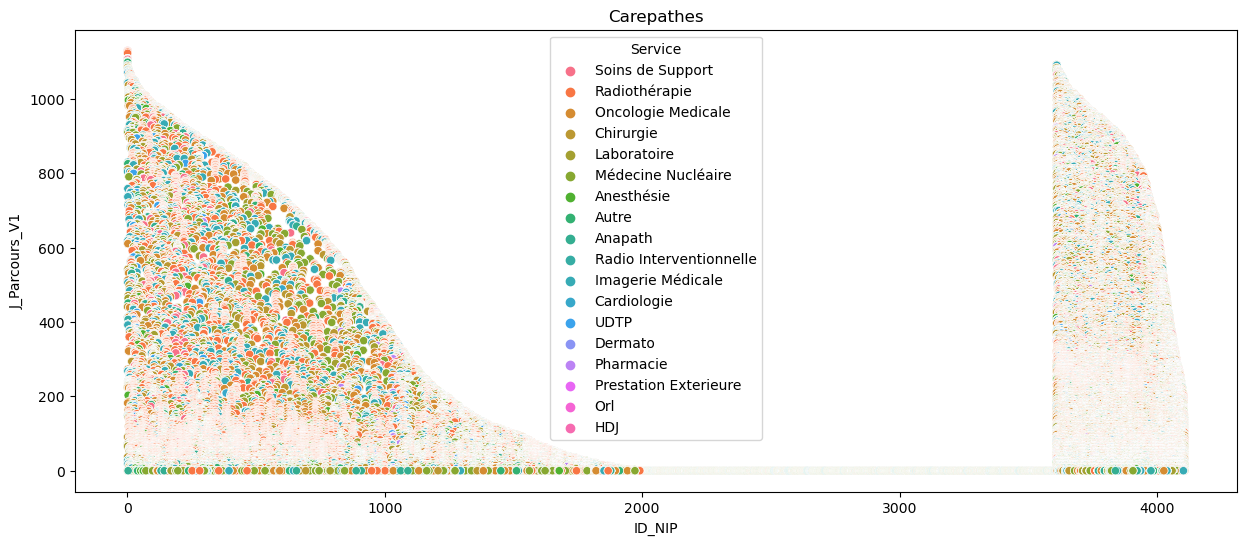

In [21]:
myouputpath="C://Users//vince//Documents//DSTI//DSTI_Projects//ML ICO Activity//06 - Temp_outputs"
plot_Complete_carepath_clustered_filtered_clustX (myouputpath, None, None,1)